###### Rasheed Alqobbaj
# Jupyter Notebook Setup and Machine Learning Workflow
### Tutorial for COMP4388 Assignment
This notebook will guide you through:
1. Setting up and using Jupyter Notebook.
2. Working with essential Python libraries: Pandas, Matplotlib, and Scikit-learn.
3. Implementing tasks from the project.

---

## Section 0: Introduction to Jupyter Notebook and Python
Jupyter Notebook is an open-source web application that allows you to create and share documents containing live code, equations, visualizations, and narrative text. It's a powerful tool for data analysis and machine learning.

### Options for Running Jupyter Notebook
1. **Local Installation**: Install Jupyter Notebook on your computer using Anaconda or pip. and program using vscode or pycharm.
2. **Google Colab**: Use Google Colab, a free cloud service with GPU support. It's a great option if you don't want to install anything on your computer.
3. **Kaggle Kernels**: Use Kaggle Kernels, another cloud-based platform for data science and machine learning.

### Notebook Cells
- **Code Cells**: Write and execute Python code.
- **Markdown Cells**: Write text using Markdown syntax.

### Keyboard Shortcuts
- **Run Cell**: Shift + Enter


---


### Python Basics
You can learn Python basics from the following resources:
- [Python Tutorial (w3schools)](https://www.w3schools.com/python/)
- [Python Documentation](https://docs.python.org/3/tutorial/index.html)
- [Python for Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

## Section 1: Install Required Libraries (Can be skipped if using Google Colab or Kaggle)
Use the commands below to install libraries.
`pip install notebook pandas matplotlib scikit-learn seaborn`

## Section 2: Key Libraries and Their Uses
We'll use:
- `pandas` for data analysis and manipulation.
- `matplotlib` and `seaborn` for data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Section 3: Working with the Dataset
### Load the Dataset
We'll load the dataset and perform basic exploration.

In [2]:
# Load the dataset
data = pd.read_csv('Customer Churn.csv')

# Show the first few rows
print("Dataset Overview:")
data.head()

Dataset Overview:


,ID,Call Failure,Complains,Charge Amount,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,100,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,100,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,200,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,100,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,100,60,0,31,1,pre-paid,active,15,227.865,yes


In [3]:
# Display dataset shape and information (data types)
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Charge Amount            3150 non-null   int64  
 4   Freq. of use             3150 non-null   int64  
 5   Freq. of SMS             3150 non-null   int64  
 6   Distinct Called Numbers  3150 non-null   int64  
 7   Age Group                3150 non-null   int64  
 8   Plan                     3150 non-null   object 
 9   Status                   3150 non-null   object 
 10  Age                      3150 non-null   int64  
 11  Customer Value           3150 non-null   float64
 12  Churn                    3150 non-null   object 
dtypes: float64(1), int64(8), object(4)
memory usage: 320.1+ KB


### Dataset Information Given:

This dataset contains randomly collected data of customer churn from a telecommunication company.
The data is collected over a period of 12 months. 
A total of number of observation is 3150.

Attribute Information:
1. ID: customer ID 
2. Freq. of use: the total number of calls 
3. Freq. of SMS: the total number of text messages 
4. Charge Amount: ordinal attribute  in which 0 refers to the lowest amount and 9 refers to highest amount
5. **Seconds of Use: total duration of calls in seconds** 
6. Distinct Numbers: total number of distinct phone calls 
7. Call Failures: the total number of call failures 
8. Complains: refers to if the customer have complains about the service or not
9. Age Group: ordinal attribute (1: younger age, 5: older age) 
10. Age: the age of customer
11. Plan: prepaid or postpaid plan 
12. Status: a binary attribute refers to the status of customers (active or not-active) 
13. Churn: the class label (churn or non-churn)
14. Customer Value: a calculated value of customer (continuous attribute)

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ID                         0
Call Failure               0
Complains                  0
Charge Amount              0
Freq. of use               0
Freq. of SMS               0
Distinct Called Numbers    0
Age Group                  0
Plan                       0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64


## Section 4: Exploratory Data Analysis (EDA)
### 1. Summary Statistics

In [5]:
# Display summary statistics
data.describe()

,ID,Call Failure,Charge Amount,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,129.882540,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916
std,909.471,7.263886,102.790931,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433
min,1.000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,788.250,1.000000,50.000000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250
50%,1575.500,6.000000,100.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000
75%,2362.750,12.000000,200.000000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750
max,3150.000,36.000000,400.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000


### 2. Visualizing Class Distribution
Let's see the churn distribution.

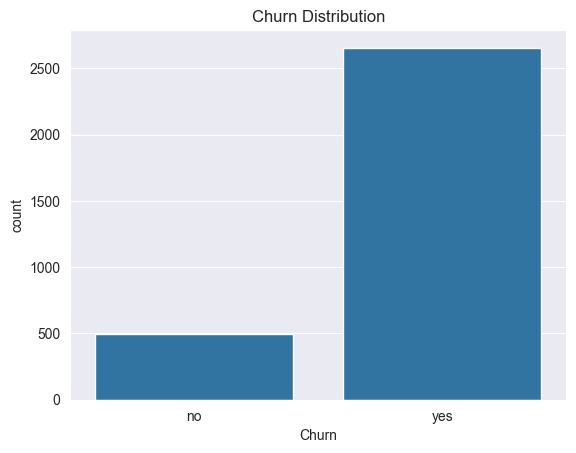

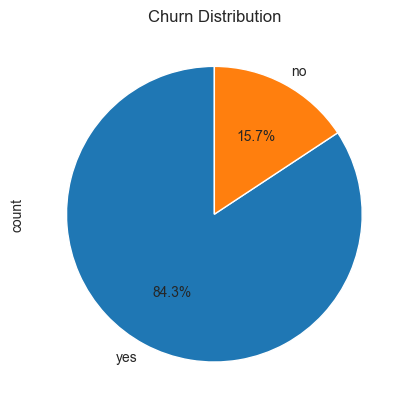

In [6]:
# Churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Pie chart
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.show()

### 3. Histograms for Churn by Age Group and Charge Amount

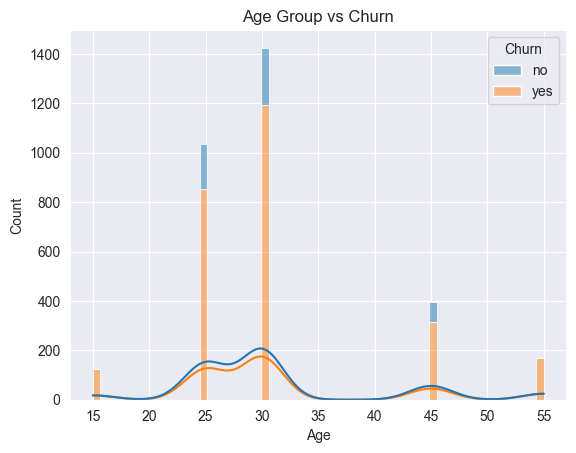

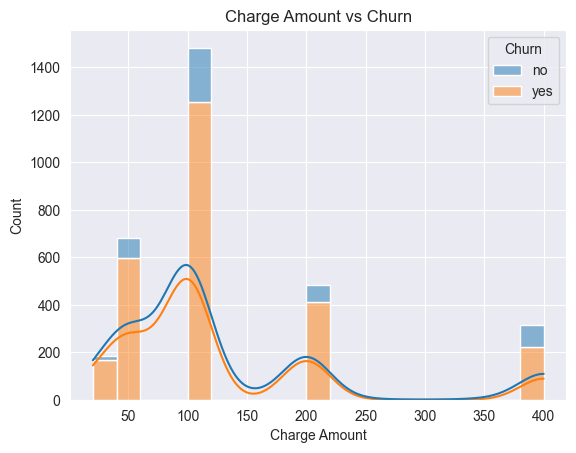

In [7]:
# Age group histogram
sns.histplot(data=data, x='Age', hue='Churn', multiple='stack', kde=True)
plt.title('Age Group vs Churn')
plt.show()

# Charge amount histogram
sns.histplot(data=data, x='Charge Amount', hue='Churn', multiple='stack', kde=True)
plt.title('Charge Amount vs Churn')
plt.show()

### 4. Boxplot for Customer Value by Churn

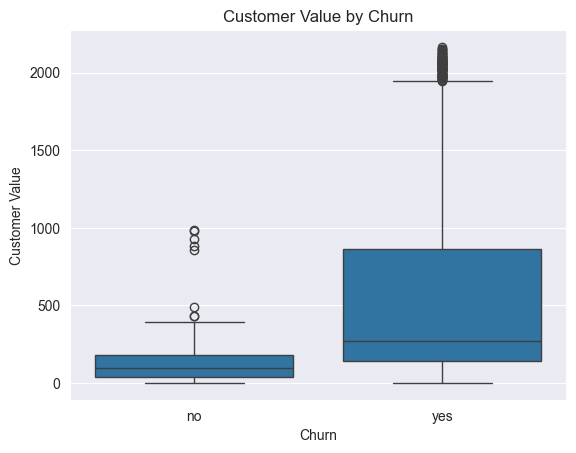

In [8]:
# Boxplot for customer value by churn
sns.boxplot(x='Churn', y='Customer Value', data=data)
plt.title('Customer Value by Churn')
plt.show()

## Section 5: Correlation Heatmap
Analyze feature correlations.

In [9]:
# Correlation heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

ValueError: could not convert string to float: 'no'

## Section 6: Splitting Data for Training and Testing
We'll prepare the data for machine learning.

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%) and testing (30%)
X = data.drop(['Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (2205, 12)
Testing Set: (945, 12)


## Section 7: Linear Regression Example
Train a regression model on the data.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

ValueError: could not convert string to float: 'no'

## Section 8: Next Steps
1. Extend the notebook to include classification models.
2. Use additional visualizations for better insights.
3. Export results and include explanations for your report.

---

Thank you for following this tutorial!
###### Rasheed Alqobbaj